# Proyek Analisis Data: E-Commerce Public Dataset


*   Nama: Alya Nabilah
*   Email: alyanabilah602@gmail.com
*   ID Dicoding: alyarubyjune



## Menentukan Pertanyaan Bisnis


*   Apa produk yang paling sering dan jarang dibeli?
*   Apa produk dengan pendapatan tertinggi? Berapa pendapatan yang didapat?
*   Apa kota yang memiliki jumlah customer terbanyak?

## Import Semua Packages/Library yang Digunakan

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
order_df = pd.read_csv("/content/order_items_dataset.csv")
product_df = pd.read_csv("/content/products_dataset.csv")
product_translate_df = pd.read_csv("/content/product_category_name_translation.csv")
customer_df = pd.read_csv("/content/customers_dataset.csv")

In [4]:
order_df = order_df.drop(columns=['shipping_limit_date',
                                  'freight_value'])

In [5]:
product_df = product_df.drop(columns=['product_name_lenght',
                                      'product_description_lenght',
                                      'product_photos_qty',
                                      'product_weight_g',
                                      'product_length_cm',
                                      'product_height_cm',
                                      'product_width_cm'])

In [6]:
merge_id = pd.merge(order_df, product_df, on='product_id', how='left')

In [7]:
sales_df = pd.merge(merge_id, product_translate_df, on='product_category_name', how='left')

**Insight:**

*   Mendapatkan satu tabel data utuh. Tabel yang terbaru memiliki nama produk dan terjemahan nama produknya dalam bahasa Inggris



### Assessing Data

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   price                          112650 non-null  float64
 5   product_category_name          111047 non-null  object 
 6   product_category_name_english  111023 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.0+ MB


In [9]:
sales_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
price,0
product_category_name,1603
product_category_name_english,1627


In [10]:
sales_df.duplicated().sum()

0

In [11]:
sales_df.describe()

,order_item_id,price
count,112650.000000,112650.000000
mean,1.197834,120.653739
std,0.705124,183.633928
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


**Insight:**

*   Mendapatkan informasi mengenai jumlah data dan tipe data dari masing-masing kolom
*   Data memiliki missing value yang terdapat pada kolom product_category_name dan product_category_name_english
*   Data tidak memiliki data yang terduplikasi
*   Tidak ada yang aneh dari ringkasan parameter statistik

In [31]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [32]:
customer_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [33]:
customer_df.duplicated().sum()

0

**Insight:**

*   Mendapatkan informasi mengenai jumlah data dan tipe data dari masing-masing kolom
*   Data memiliki tidak missing value
*   Data tidak memiliki data yang terduplikasi



### Cleaning Data

In [12]:
sales_df.dropna(axis=0, inplace=True)

**Insight:**

*   Data sales_df sudah bersih dari missing value yang ditemukan
*   Data customer_df tidak perlu dibersihkan kembali karena tidak memiliki missing value, invalid value, duplicate value, maupun hal lainnya





## Exploratory Data Analysis (EDA)

### Mengeksplorasi Penjualan Berdasarkan Jumlahnya

In [14]:
total_order = sales_df.groupby(by='product_category_name_english').order_id.nunique().sort_values(ascending=False)

In [15]:
total_order_df = total_order.reset_index()
total_order_df.columns = ['product_category_name_english', 'order_count']

In [16]:
total_order_df.to_csv("order_count_by_category.csv", index=False)

In [36]:
print(total_order_df)

   product_category_name_english  order_count
0                 bed_bath_table         9417
1                  health_beauty         8836
2                 sports_leisure         7720
3          computers_accessories         6689
4                furniture_decor         6449
..                           ...          ...
66         arts_and_craftmanship           23
67                    la_cuisine           13
68             cds_dvds_musicals           12
69     fashion_childrens_clothes            8
70         security_and_services            2

[71 rows x 2 columns]


**Insight:**

*   Mendapatkan tabel yang berisi seberapa sering suatu produk dibeli oleh customer



### Mengeksplorasi Penjualan Berdasarkan Pendapatannya

In [17]:
total_revenue = sales_df.groupby(by='product_category_name_english')['price'].sum().sort_values(ascending=False)

In [18]:
total_revenue_df = total_revenue.reset_index()
total_revenue_df.columns = ['product_category_name_english', 'total_revenue']

In [19]:
total_revenue_df.to_csv("total_revenue_by_category.csv", index=False)

In [35]:
print(total_revenue_df)

   product_category_name_english  total_revenue
0                  health_beauty     1258681.34
1                  watches_gifts     1205005.68
2                 bed_bath_table     1036988.68
3                 sports_leisure      988048.97
4          computers_accessories      911954.32
..                           ...            ...
66                       flowers        1110.04
67                home_comfort_2         760.27
68             cds_dvds_musicals         730.00
69     fashion_childrens_clothes         569.85
70         security_and_services         283.29

[71 rows x 2 columns]


**Insight:**

*   Mendapatkan tabel yang berisi total pendapatan berdasarkan produk yang terjual



In [37]:
customer_city = customer_df.groupby(by='customer_city').customer_unique_id.nunique().sort_values(ascending=False)

In [38]:
customer_city_df = customer_city.reset_index()
customer_city_df.columns = ['customer_city', 'city_count']

In [39]:
customer_city_df.to_csv('customer_count_by_city.csv', index=False)

In [40]:
print(customer_city_df)

       customer_city  city_count
0          sao paulo       14984
1     rio de janeiro        6620
2     belo horizonte        2672
3           brasilia        2069
4           curitiba        1465
...              ...         ...
4114       ibertioga           1
4115        ibiajara           1
4116          ibiara           1
4117     ibicuitinga           1
4118          lagoao           1

[4119 rows x 2 columns]


**Insight:**

*   Mendapatkan tabel yang berisi nama kota dengan jumlah customer dari yang terbanyak hingga yang paling sedikit

*(tabel yang disimpan akan digunakan untuk keperluan pembuatan dashboard)*

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa produk yang paling sering dan jarang dibeli?

<ipython-input-28-23dc7f8122ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_count', y='product_category_name_english', data=total_order_df.head(5), palette=colors, ax=ax[0])
<ipython-input-28-23dc7f8122ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_count', y='product_category_name_english', data=total_order_df.sort_values(by='order_count', ascending=True).head(5), palette=colors, ax=ax[1])


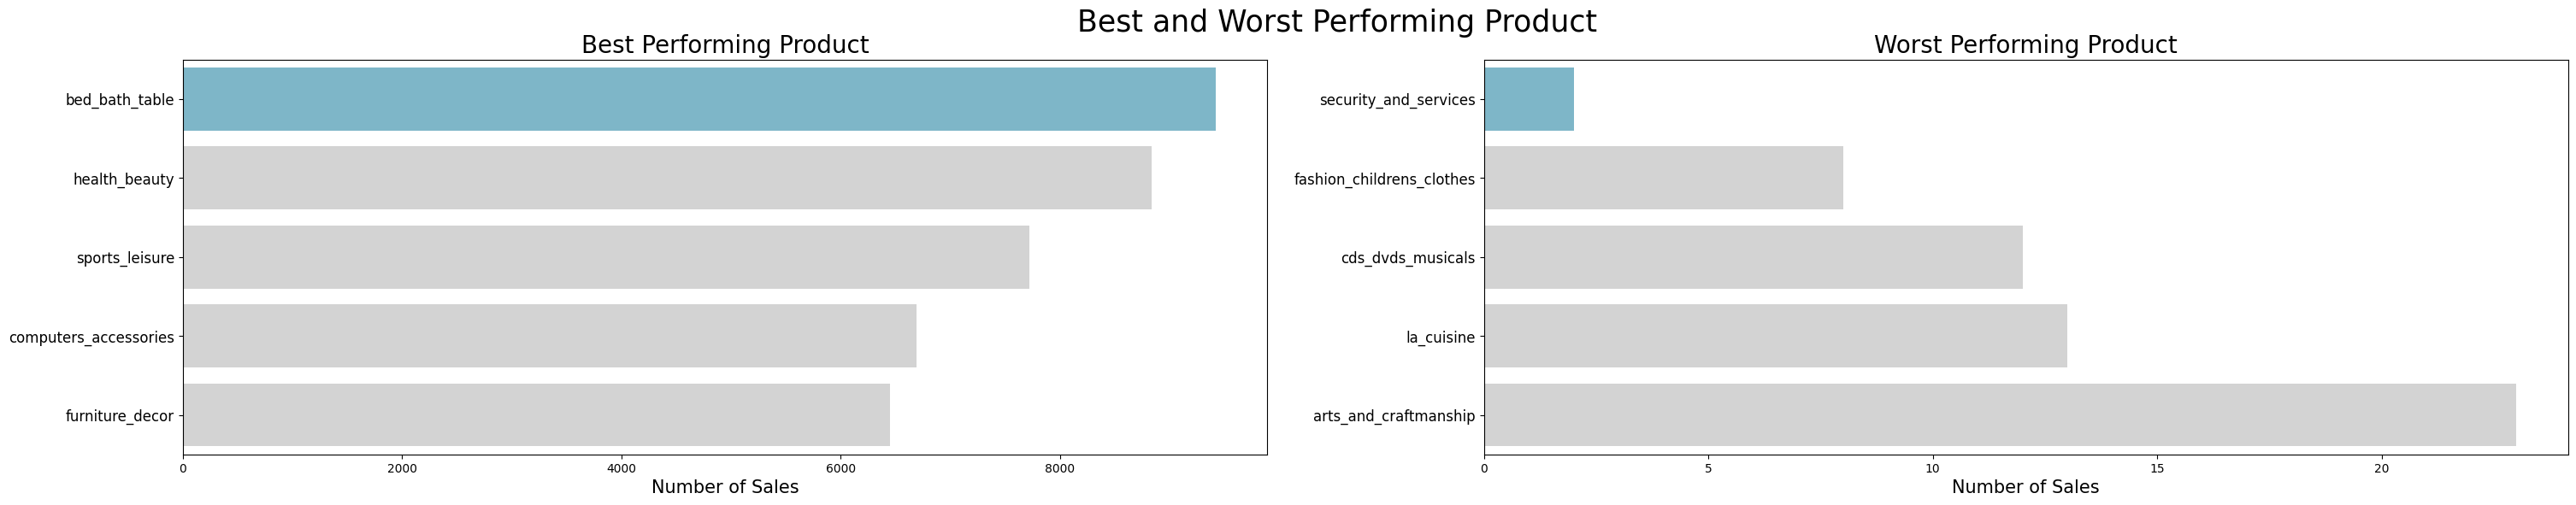

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(36, 6))

colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(x='order_count', y='product_category_name_english', data=total_order_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('Number of Sales', fontsize=15)
ax[0].set_title('Best Performing Product', loc='center', fontsize=20)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='order_count', y='product_category_name_english', data=total_order_df.sort_values(by='order_count', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Number of Sales', fontsize=15)
ax[1].set_title('Worst Performing Product', loc='center', fontsize=20)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Best and Worst Performing Product', fontsize=25)
plt.show()

### Pertanyaan 2: Apa produk dengan pendapatan tertinggi? Berapa pendapatan yang didapat?

<ipython-input-41-259ea32fbdbe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='product_category_name_english', data=total_revenue_df.head(10), palette=colors, ax=ax)


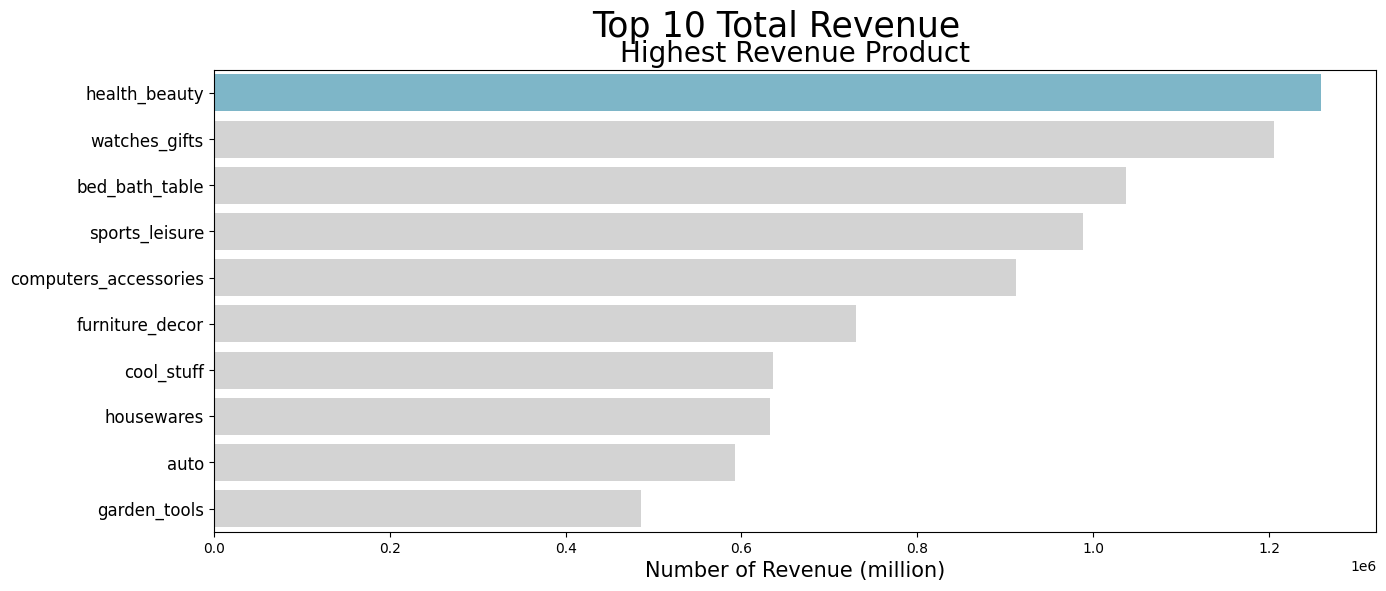

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))

colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(x='total_revenue', y='product_category_name_english', data=total_revenue_df.head(10), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel('Number of Revenue (million)', fontsize=15)
ax.set_title('Highest Revenue Product', loc='center', fontsize=20)
ax.tick_params(axis='y', labelsize=12)

plt.suptitle('Top 10 Total Revenue', fontsize=25)
plt.show()

### Pertanyaan 3: Apa kota yang memiliki jumlah customer terbanyak?

<ipython-input-43-31b17f0073f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city_count', y='customer_city', data=customer_city_df.head(5), palette=colors, ax=ax)


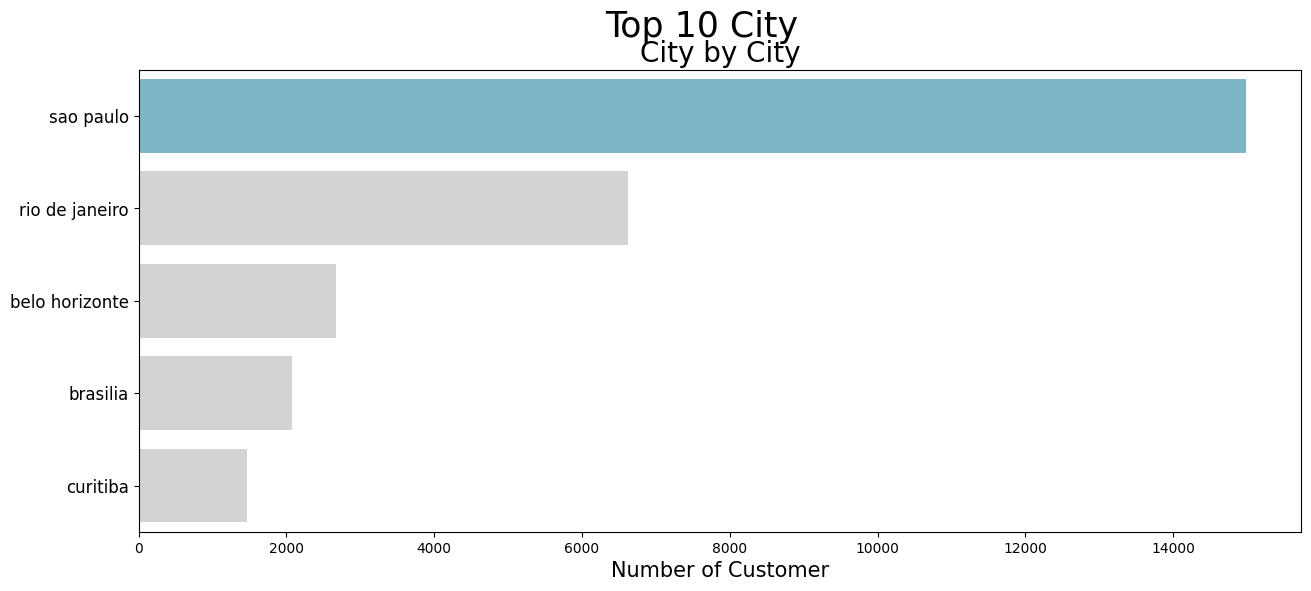

In [43]:
fig, ax = plt.subplots(figsize=(15, 6))

colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(x='city_count', y='customer_city', data=customer_city_df.head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel('Number of Customer', fontsize=15)
ax.set_title('City by City', loc='center', fontsize=20)
ax.tick_params(axis='y', labelsize=12)

plt.suptitle('Top 10 City', fontsize=25)
plt.show()

**Insight:**

*   Visualisasi berupa horizontal bar chart untuk memvisualisasikan produk apa yang sering dan jarang dibeli, produk apa yang memiliki pendapatan yang tinggi, dan kota apa yang memiliki customer terbanyak


## Conclusion

*   Produk yang paling sering dibeli adalah bed_bath_table
*   Produk yang paling jarang dibeli adalah security_and_services
*   Produk dengan pendapatan tertinggi adalah health_beauty yang kemudian disusul oleh watches_gifts dan bed_bath_table
*   Kota dengan jumlah customer terbanyak adalah Sao Paulo yang kemudian disusul oleh Rio de Janeiro dengan perbedaan yang cukup signifikan







## Recommendation

*   Perusahaan dapat meningkatkan produksi pada produk-produk bed_bath_table jika sering mengalami kehabisan stok
*   Perusahaan dapat mengurangi produksi pada produk-produk security_and_services, produk yang jarang dibeli ini akan menumpuk di gudang nantinya jika terus diproduksi namun tidak kunjung terjual
*   Perusahaan dapat melakukan pemasaran terhadap produk-produk dengan pendapatan yang tinggi untuk meningkatkan penjualan perusahaan
*   Perusahaan dapat melakukan pemasaran tersebut di kota-kota dengan customer yang banyak agar pemasaran dapat menjangkau audiens yang tepat



